<img src="scikit_learn_logo.png">

## Regresión Logística


En un modelo que explica el comportamiento de una variable objetivo binaria en función de la/las variables explicativas.

Puede servirnos para predecir la probabilidad de que un suceso ocurra o crear dos categorías de un suceso.

La expresión matemática que define la regresiçon logística es la siguiente:


$$
P  = \frac{e^{\beta_0+ \beta_1X} }{1+e^{\beta_0+ \beta_1X}} => log(\frac{P}{1-P}) = \beta_0+ \beta_1X
$$

In [105]:
import pandas as pd
import numpy as np
# regresion lineal de scikit-learn
from sklearn.linear_model import LogisticRegression   
# función para separar set entrenamiento - testeo
from sklearn.model_selection import train_test_split 
# métrica para medir la bondad del modelo
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, roc_auc_score              
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
import os



In [25]:
# importamos la base de datos
csv_path = os.path.join(os.getcwd(), '..', 'datasets', 'Diabetes', 'diabetes2.csv')
diabetes_df = pd.read_csv(csv_path)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Separamos lo primero set de entrenamiento y set de testeo, igual que hicimos en regresión lineal:

In [26]:
train, test = train_test_split(diabetes_df, test_size = 0.3, random_state = 42)

print(f'Dimensiones de coches_df: {diabetes_df.shape}')
print(f'Dimensiones de train: {train.shape}')
print(f'Dimensiones de test: {test.shape}')

Dimensiones de coches_df: (768, 9)
Dimensiones de train: (537, 9)
Dimensiones de test: (231, 9)


La variable objetivo de este problema será **Outcome**. Es una variable binaria, solo puede tener los valores 0 y 1.

Vamos a utilizar la función **info()**, para ver un resumen de la base de datos con la que contamos en nuestro set de entrenamiento.    

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 334 to 102
Data columns (total 9 columns):
Pregnancies                 537 non-null int64
Glucose                     537 non-null int64
BloodPressure               537 non-null int64
SkinThickness               537 non-null int64
Insulin                     537 non-null int64
BMI                         537 non-null float64
DiabetesPedigreeFunction    537 non-null float64
Age                         537 non-null int64
Outcome                     537 non-null int64
dtypes: float64(2), int64(7)
memory usage: 42.0 KB


Visualizando la matriz de correlación, podemos intuir cuales son las variables que mayor valor predictivo pueden ofrecer a nuestro modelo.


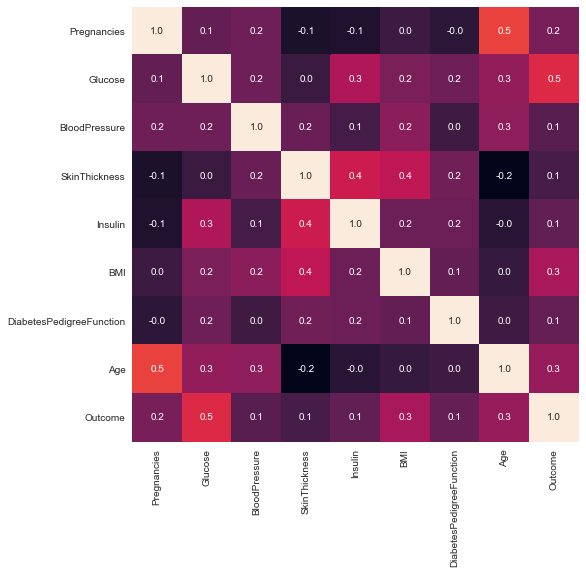

In [28]:
# nos da el indice de correlacion de pearson de las variables numéricas 
matriz_correlacion = train.corr(method = 'pearson')   

# si tienes dudas sobre esto, echa un vistazo al tutorial de seaborn donde lo explico
figure = plt.figure(figsize = (8,8))
sns.heatmap(matriz_correlacion, fmt = '.1f', annot = True, cbar = False);

Planteamos el ejercicio en un primer como un problema de dos dimensiones, con una **única variable explicativa** para que sea mucho más sencillo entender los conceptos de este tipo de algoritmos.

La variable que parece ser mejor para el problema es **Glucose**, aunque su correlación con **Outcome** tampoco es demasiado elevada. Veamos su distribución mediante un histograma y diagrama de caja y bigotes:

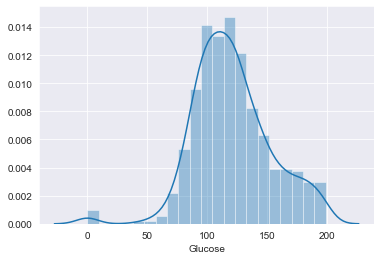

In [29]:
sns.distplot(train['Glucose'])

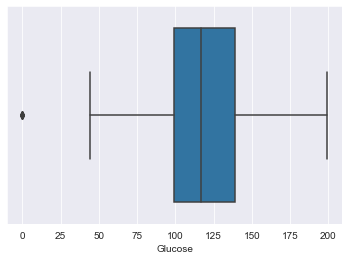

In [30]:
sns.boxplot(train['Glucose'])

Vamos a considerar los valores nulos de glucosa como claros valores atípicos que pueden jugar en contra nuestra a la hora de entrenar el modelo, los quitamos!

In [31]:
# quitamos las filas que tengan Glucose = 0
train = train.loc[train['Glucose'] != 0]

In [32]:
train.shape

(532, 9)

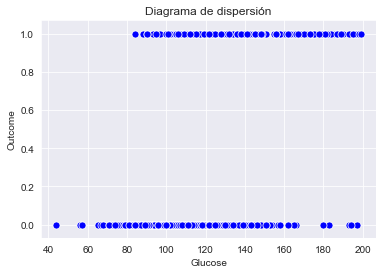

In [33]:
sns.scatterplot(data = train, x = 'Glucose', y = 'Outcome', color = 'blue', s = 50)
plt.title('Diagrama de dispersión')
plt.ylabel('Outcome')
plt.xlabel('Glucose');

Con esta gráfica nos hacemos a la idea de que el resultado del modelo no va a ser bueno. Es imposible hacer una separación medianamente buena de la variable objetivo atendiendo solo a una dimensión ya que hay demasiado **solapamiento**.

De todas maneras nos sirve para entender la lógica detrás de este tipo de modelo, vamos a entrenarlo:

In [35]:
# definimos cuales son las variables explicativas y objetivo para test y train
X_train = train['Glucose']
y_train = train['Outcome']
X_test = test['Glucose']
y_test = test['Outcome']

In [39]:
# entrenamos el modelo de regresión logística
logit = LogisticRegression()
logit.fit(X_train.values.reshape(-1,1), y_train.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Este modelo, una vez entrenado permite hacer dos tipos de predicciones:
- prediccion de probabilidad: **predict_proba()**
- clasificación: **predict()**

La clasificación en realidad se hace a partir de la proababilidad que se prediga, veamos un ejemplo que hará las cosa mucho más sencillas de entender:

In [55]:
# presenta tantas filas como instancias se hayan pasado
# 2 columnas para cada instancia, la primera indica la probabilidad de 
# Objetivo = 0, y la segunda de objetivo = 1
y_proba = logit.predict_proba(X_train.values.reshape(-1,1))

print(y_proba)

[[0.87898995 0.12101005]
 [0.82272217 0.17727783]
 [0.54758113 0.45241887]
 ...
 [0.84736734 0.15263266]
 [0.48053548 0.51946452]
 [0.65450512 0.34549488]]


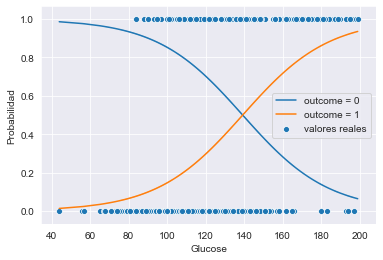

In [65]:
# la primera columna de y_proba
sns.lineplot(x = X_train.values, y = y_proba[:,0], label = 'outcome = 0')

# ahora la segunda columna
sns.lineplot(x = X_train.values, y = y_proba[:,1],  label = 'outcome = 1')

# ahora muestro los valores reales de nuevo
sns.scatterplot(x = 'Glucose', y = 'Outcome', data = train, label = 'valores reales')

plt.ylabel('Probabilidad')
plt.legend();

Revisamos el gráfico:
- Curva azul: nos dice la probabilidad de para un cierto valor de Glucosa, la variable objetivo (diabetes) sea = 0. Toma valores cercanos a 1 para valores bajos de glucosa. 
- Curva naranja: Mismo razonamiento pero caso contrario
- Punto de corte: exactamente en probabilidad = 0,5. Basicamente lo que nos esta diciendo es que el modelo tomará como Outcome = 0 todas aquellas entradas que tengan Glucosa inferior a unos 138 y 1 para el caso contrario. Es decir, el punto de corte de las curvas es el **umbral de decisión**.

In [68]:
predicciones = logit.predict(X_test.values.reshape(-1,1))

Los dibujamos para representar la explicación anterior:

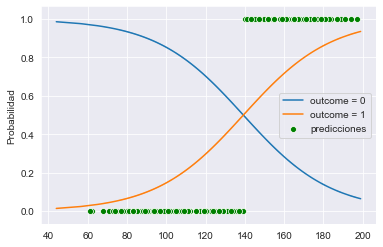

In [71]:
sns.lineplot(x = X_train.values, y = y_proba[:,0], label = 'outcome = 0')

sns.lineplot(x = X_train.values, y = y_proba[:,1],  label = 'outcome = 1')

sns.scatterplot(X_test.values , predicciones, label = 'predicciones',\
               color = 'green')

plt.ylabel('Probabilidad')
plt.legend();

Una vez visto esto, vamos ahora a predecir la variable objetivo con el set de testo y usaremos la **matriz de confusión** para estudiar los errores que se han producido:

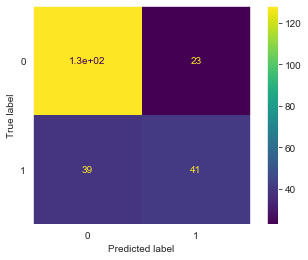

In [120]:
plot_confusion_matrix(logit,                       # modelo ya entrenado
                     X_test.values.reshape(-1,1),  # entrada
                     y_test);                      # salida real
plt.grid(False);

Matriz de confusión:
- celda superior izquierda: **verdaderos negativos**, predecimos outcome = 0 y acertamos
- celda superior derecha: **falsos positivos**, predecimos outcome = 1 y fallamos
- celda inferior izquierda: **falsos negativos**, predecimos outcome = 0 y fallamos
- celda inferior derecha: **verdaderos positivos**, predecimos outcome  1 y acertamos        

Como era de esperar, el ratio de aciertos en los que son outcome = 0 es superior, ya que el caso contrario comparte todo su rango de glucosa con este.




In [125]:
# El porcentaje de acierto general
print(f"Accuracy: {(130 + 41) / (130 + 41 + 23 + 39) * 100:.2f} %")

Accuracy: 73.39 %


Veamos ahora como queda la **curva ROC**, una función que relaciona el ratio de verdaderos positivos entre el ratio de falsos positivos.

Cuanto más area abarque esta curva, mejor sera el clasificador. Es una manera de comparar entre clasificadores dado un problema concreto.

Scikit learn presenta una función ya creada para dibujar esta curva, muy similar a como hemos hecho con la matriz de confusión: **plot_confusion_matrix** y **plot_roc_curve**.

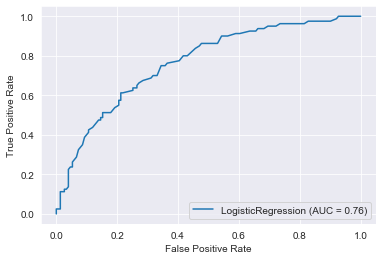

In [126]:
plot_roc_curve(logit,                         # modelo ya entrenado
                X_test.values.reshape(-1,1),  # entrada
                y_test);                      # salida real


Hemos llegado al final de la guía. En resumen, hemos visto como de sencillo es hacer un modelo de regresión logística con la libreria Scikit Learn, las opciones que nos da una vez entrenado el modelo para predecir tanto probabilidades, como directamente clasificaciones y, algunos métodos para cuantificar la bondad del modelo clasificador.

Utilizando más de una variable, podría mejorarse fácilmente las métricas del modelo. Te animo a que lo intentes.

En otra guía se verá como hacer un modelo de regresión haciendo uso de **statsmodels**, donde se profundizará más en los detalles.